In [1]:
# import seaborn as sns
import matplotlib.pyplot as plt
from foof.util import create_psd
%matplotlib inline

In [5]:
# ING
%run ../bin/ei.py ../data/test/test_ing \
    -t 1 --stim 0.25 --rate 30 --period 1 \
    --I_e 0.1 --I_i 0.8 --I_i_sigma 0.0 --I_e_sigma 0.0 \
    --w_e 2.0 --w_ee 0.0 --w_ii 0.5 \
    --w_ei .1 --w_ie 1.2 --stdp 

INFO       No numerical integration method specified for group 'neurongroup_4', using method 'euler' (took 0.15s, trying other methods took 1.45s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_5', using method 'euler' (took 0.14s, trying other methods took 1.46s). [brian2.stateupdaters.base.method_choice]


Trial 0


BrianObjectException: Original error and traceback:
Traceback (most recent call last):
  File "/home/ejp/anaconda/lib/python2.7/site-packages/brian2/core/network.py", line 686, in before_run
    obj.before_run(run_namespace)
  File "/home/ejp/anaconda/lib/python2.7/site-packages/brian2/input/spikegeneratorgroup.py", line 171, in before_run
    dt))
NotImplementedError: The period of spikegeneratorgroup is <spikegeneratorgroup.period: 1. * second>, which is not an integer multiple of its dt of 1e-05.

Error encountered with object named "spikegeneratorgroup".
Object was created here (most recent call only, full details in debug log):
  File "/home/ejp/src/syncological/ei.py", line 152, in model
    period=period)

An error occurred when preparing an object. NotImplementedError: The period of spikegeneratorgroup is <spikegeneratorgroup.period: 1. * second>, which is not an integer multiple of its dt of 1e-05.
(See above for original error message and traceback.)

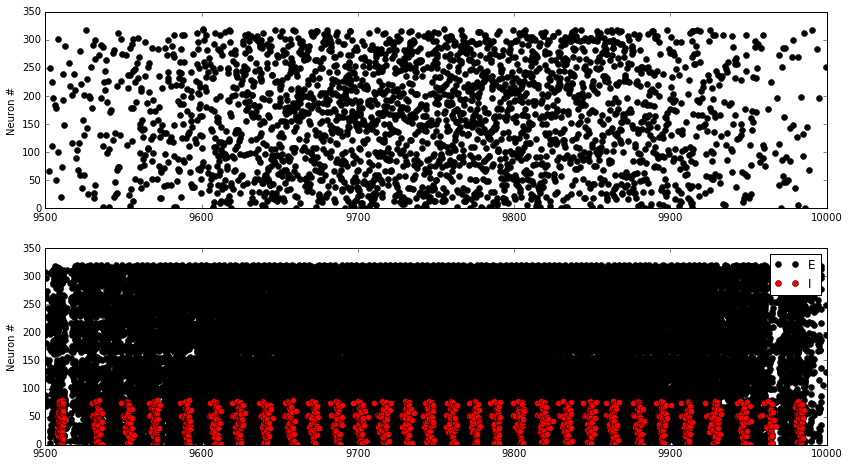

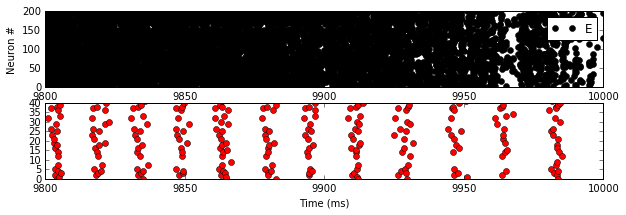

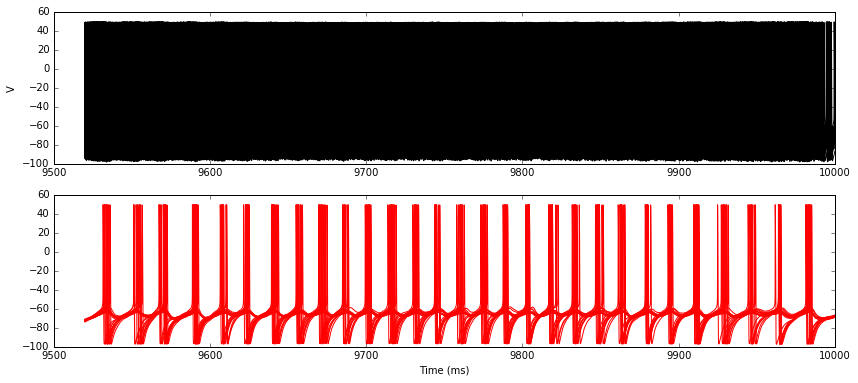

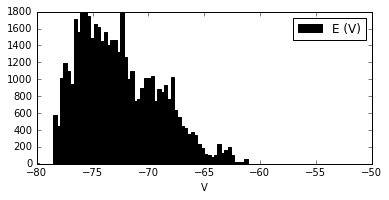

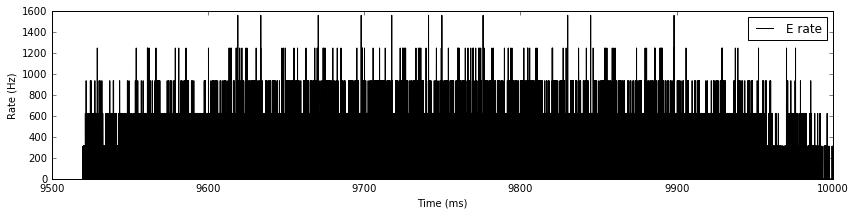

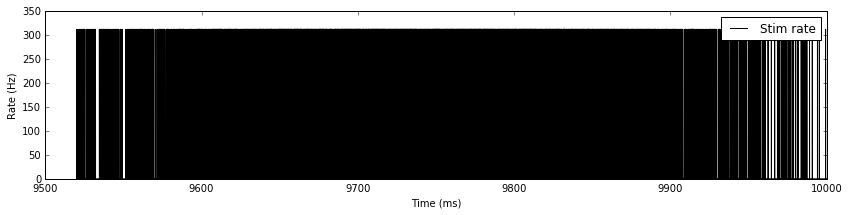

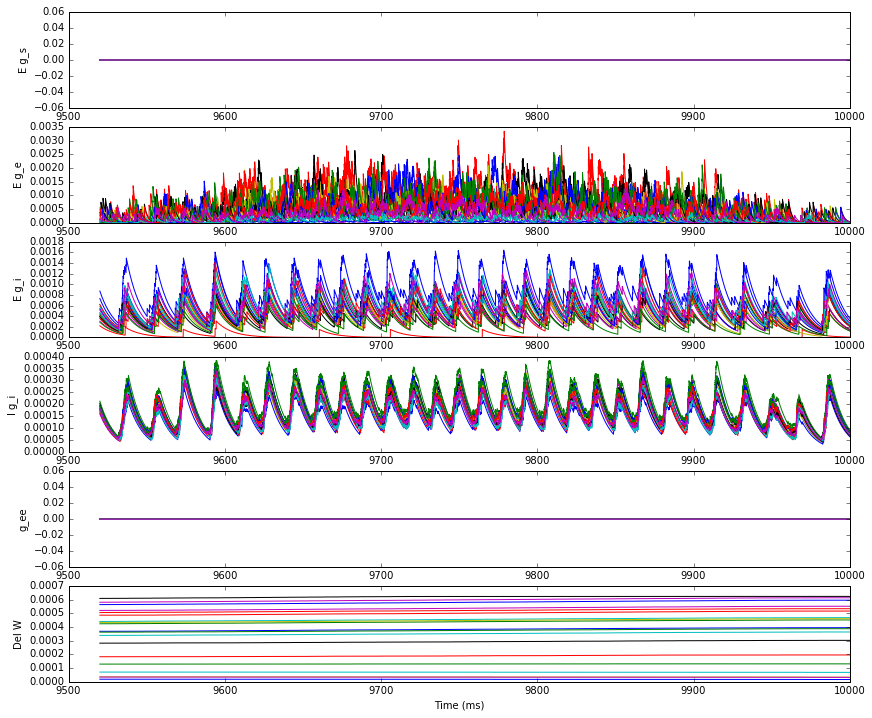

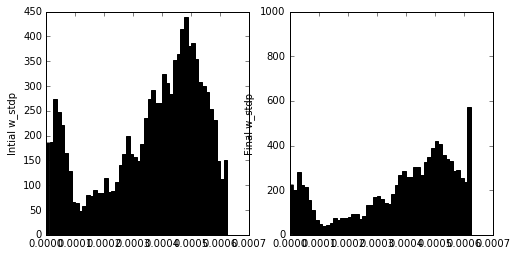

In [8]:
# To plot
trial = 19
period = 0.5
if trial == 0:
    t_min = 0
else:
    t_min = period * trial
t_max = t_min + period

# Unpack
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']
weights = result['weights_e']

t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[:, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

subplot(615)
plot(traces_e.t[tn:]/ms, traces_e.g_ee[1:20, tn:].T, label='E (g_ee)')
ylabel("g_ee")
xlabel("Time (ms)")

subplot(616)
plot(weights.t[tn:]/ms, weights.w_stdp[1:20, tn:].T, label='w_stdp')
ylabel("Del W")
xlabel("Time (ms)")

# # ------------------------------------------------------------
# # Spectra
# lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
# lfp = lfp[1000:]  # Drop initial spike

# figure(figsize=(6,6))
# subplot(211)
# plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
# xlabel("Time (ms)")
# ylabel("Sim. LFP (msiemens)")

# subplot(212)
# fs, spec = create_psd(lfp, 100000)
# plot(fs[:60], spec[:60], color='k')
# xlabel("Freq (Hz)") 
# ylabel("PSD")

# -----------
# stdp
figure(figsize=(8,4))
subplot(121)
plt.hist(result['weights_e'].w_stdp[:,1-1], color='k', bins=50);
plt.ylabel("Intial w_stdp")
subplot(122)
plt.hist(result['weights_e'].w_stdp[:,50000-1], color='k', bins=50);
plt.ylim(0,1000)
plt.ylabel("Final w_stdp")

In [5]:
# Ping
%run ../bin/ei.py ../data/test/test_ping \
    -t 10 --stim 0.25 --rate 30 --period 0.5 \
    --I_e 0.0 --I_i 0.1 --I_i_sigma 0.0 --I_e_sigma 0.0 \
    --w_e 2.0 --w_ee 0.1 --w_ii 0.5 \
    --w_ei .5 --w_ie 1.2 --stdp --balanced

Trial 0
Starting simulation for duration 0.5 s
40.97 ms (8%) simulated in 10s, estimated 1m 52s remaining.
82.07 ms (16%) simulated in 20s, estimated 1m 42s remaining.
124.63 ms (24%) simulated in 30s, estimated 1m 30s remaining.
164.41 ms (32%) simulated in 40s, estimated 1m 22s remaining.
206.64 ms (41%) simulated in 50s, estimated 1m 11s remaining.
248.84 ms (49%) simulated in 1m 0s, estimated 1m 1s remaining.
290.86 ms (58%) simulated in 1m 10s, estimated 50s remaining.
0.32769 s (65%) simulated in 1m 20s, estimated 42s remaining.
0.36972 s (73%) simulated in 1m 30s, estimated 32s remaining.
0.41186 s (82%) simulated in 1m 40s, estimated 21s remaining.
0.45425 s (90%) simulated in 1m 50s, estimated 11s remaining.
0.49665 s (99%) simulated in 2m 0s, estimated 1s remaining.
0.5 s (100%) simulated in 2m 0s
Saving results
Trial 1
Starting simulation for duration 0.5 s
20.53 ms (4%) simulated in 10s, estimated 3m 54s remaining.
40.98 ms (8%) simulated in 20s, estimated 3m 44s remaining.

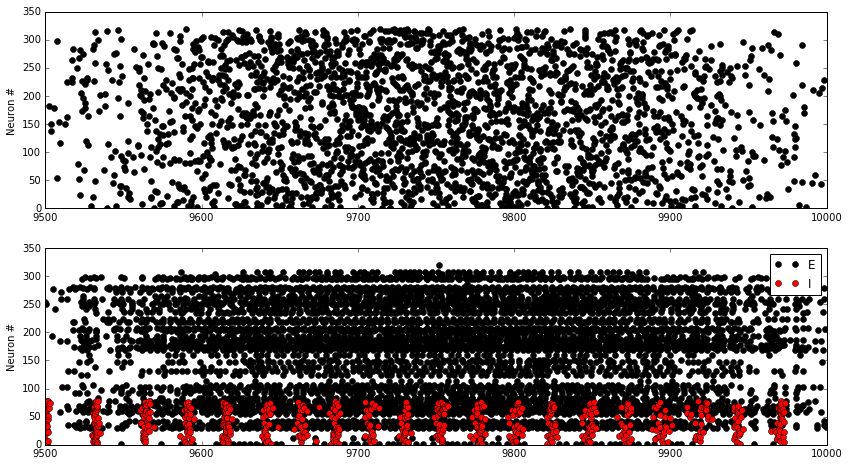

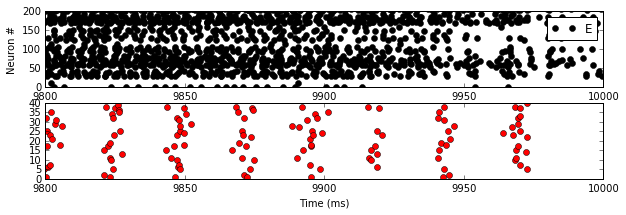

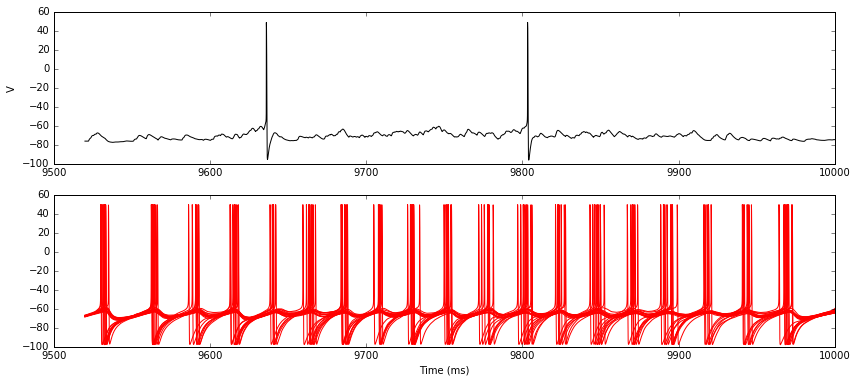

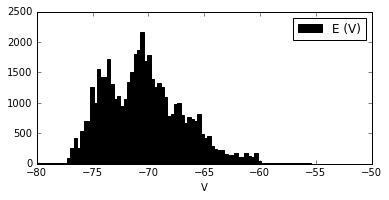

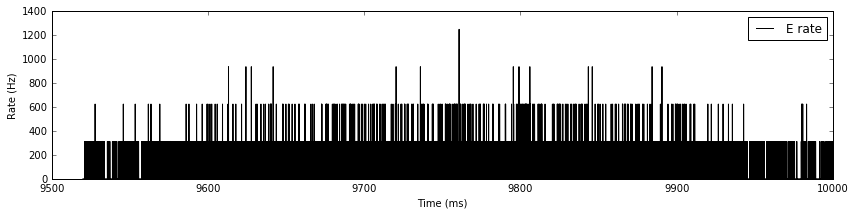

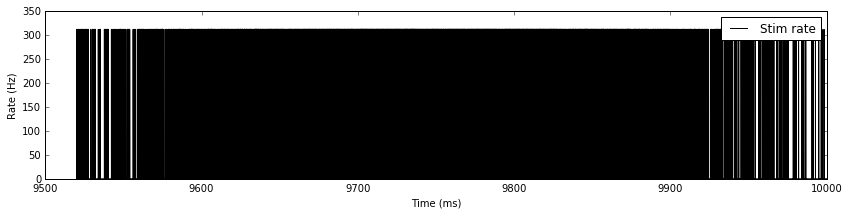

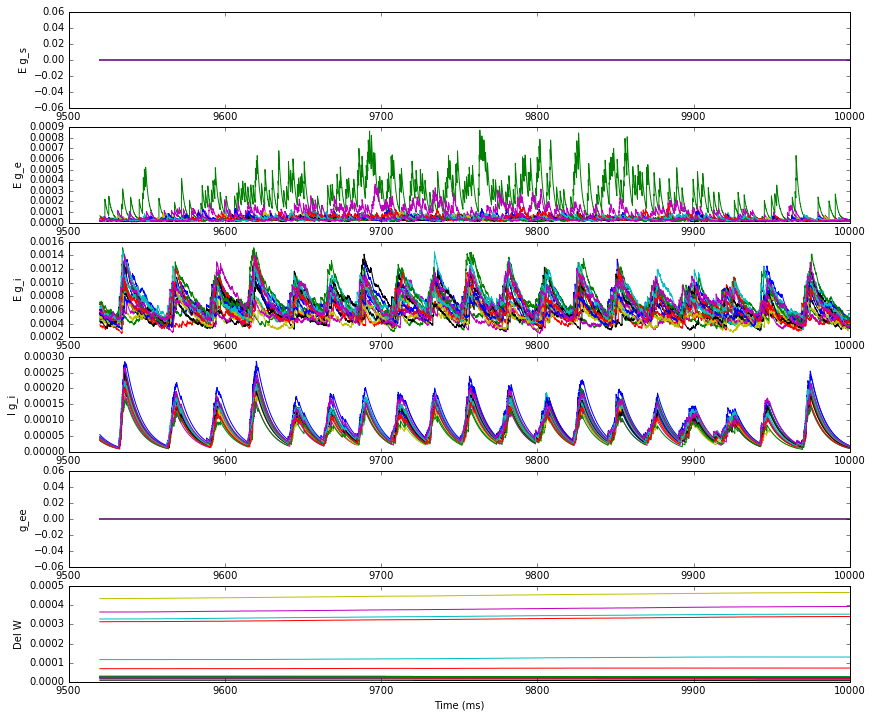

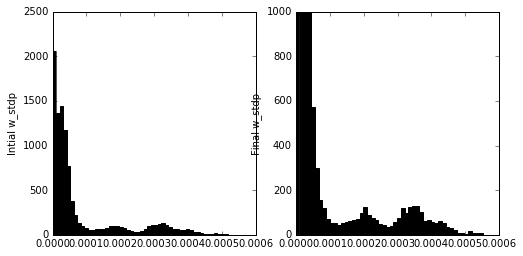

In [4]:
trial = 19
period = 0.5
if trial == 0:
    t_min = 0
else:
    t_min = period * trial
t_max = t_min + period

# Unpack
spikes_e = result['spikes_e']
spikes_stim = result['spikes_stim']
spikes_i = result['spikes_i']
pop_e = result['pop_e']
pop_stim = result['pop_stim']
traces_e = result['traces_e']
traces_i = result['traces_i']
weights = result['weights_e']

t = 2000

# ------------------------------------------------------------
# Raster full
figure(figsize=(14, 12))
subplot(311)
plot(spikes_stim.t/ms, spikes_stim.i, 'o', label='', color='k')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()

subplot(312)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlim(t_min * 1000, t_max * 1000)
ylabel("Neuron #")
legend()


# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(spikes_e.t/ms, spikes_e.i, 'o', label='E', color='k')
ylabel("Neuron #")
ylim(0, 200)
xlim(t_max * 1000 - 200, t_max * 1000)
legend()

subplot(212)
plot(spikes_i.t/ms, spikes_i.i, 'o', label='I', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max * 1000 - 200, t_max * 1000)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(traces_e.t[tn:]/ms, traces_e.V[0, tn:].T/mvolt, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(traces_i.t[tn:]/ms, traces_i.V[:, tn:].T/mvolt, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))
subplot(211)
hist(traces_e.V[0][tn:]/mvolt, label='E (V)', color='k', bins=100, range=(-80, -50))
xlabel("V")
legend()

# ------------------------------------------------------------
# E rate
figure(figsize=(14, 3))
plot(pop_e.t[tn:]/ms, pop_e.rate[tn:]/Hz, color='k', label='E rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

figure(figsize=(14, 3))
plot(pop_stim.t[tn:]/ms, pop_stim.rate[tn:]/Hz, color='k', label='Stim rate')
ylabel('Rate (Hz)')
xlabel("Time (ms)")
legend()

# ------------------------------------------------------------
figure(figsize=(14, 12))
subplot(611)
plot(traces_e.t[tn:]/ms, traces_e.g_s[1:20, tn:].T, label='E (g_s)')
ylabel("E g_s")

subplot(612)
plot(traces_e.t[tn:]/ms, traces_e.g_e[1:20, tn:].T, label='E (g_e)')
ylabel("E g_e")

subplot(613)
plot(traces_e.t[tn:]/ms, traces_e.g_i[1:20, tn:].T, label='E (g_i)')
ylabel("E g_i")

subplot(614)
plot(traces_i.t[tn:]/ms, traces_i.g_i[1:20, tn:].T, label='I (g_i)')
ylabel("I g_i")
# legend(loc='best')

subplot(615)
plot(traces_e.t[tn:]/ms, traces_e.g_ee[1:20, tn:].T, label='E (g_ee)')
ylabel("g_ee")
xlabel("Time (ms)")

subplot(616)
plot(weights.t[tn:]/ms, weights.w_stdp[1:20, tn:].T, label='w_stdp')
ylabel("Del W")
xlabel("Time (ms)")

# # ------------------------------------------------------------
# # Spectra
# lfp = (np.abs(traces_e.g_s.sum(0)) + np.abs(traces_e.g_ee.sum(0)) + np.abs(traces_e.g_i.sum(0)))
# lfp = lfp[1000:]  # Drop initial spike

# figure(figsize=(6,6))
# subplot(211)
# plot(traces_i.t[1000:]/ms, lfp, color='k',  label='LFP')
# xlabel("Time (ms)")
# ylabel("Sim. LFP (msiemens)")

# subplot(212)
# fs, spec = create_psd(lfp, 100000)
# plot(fs[:60], spec[:60], color='k')
# xlabel("Freq (Hz)") 
# ylabel("PSD")

# -----------
# stdp
figure(figsize=(8,4))
subplot(121)
plt.hist(result['weights_e'].w_stdp[:,1-1], color='k', bins=50);
plt.ylabel("Intial w_stdp")
subplot(122)
plt.hist(result['weights_e'].w_stdp[:,50000-1], color='k', bins=50);
plt.ylim(0,1000)
plt.ylabel("Final w_stdp")